Safety score

In [ ]:
# import numpy as np
# import json 

# def calculate_safety_score(theta, t, alpha, beta, sigma, eta):
#     if t < theta:
#         return sigma * (alpha * (theta**2 - t**2) + beta * (theta - t))
#     else:
#         return eta * (alpha * (theta**2 - t**2) + beta * (theta - t))

# def calculate_path_safety_score(perfect_path, driven_path, alpha, beta, sigma, eta):
#     safety_score = 0
#     for i in range(len(perfect_path)):
#         theta = np.sqrt(perfect_path[i][0]**2 + perfect_path[i][1]**2)
#         t = np.sqrt((driven_path[i][0] - perfect_path[i][0])**2 + (driven_path[i][1] - perfect_path[i][1])**2)
#         safety_score += calculate_safety_score(theta, t, alpha, beta, sigma, eta)
#     return safety_score

# def calculate_path_safety_score_AB(perfect_path, driven_path, alpha, beta, sigma, eta, velocity, acceleration):
#     safety_score = 0
#     for i in range(len(perfect_path)):
#         theta = np.sqrt(perfect_path[i][0]**2 + perfect_path[i][1]**2)
#         t = np.sqrt((driven_path[i][0] - perfect_path[i][0])**2 + (driven_path[i][1] - perfect_path[i][1])**2)
#         alpha_i = alpha*(1+acceleration)
#         beta_i = beta*(1+velocity)
#         safety_score += calculate_safety_score(theta, t, alpha_i, beta_i, sigma, eta)
#     return safety_score


# # Load the perfect and driven path JSON files
# with open('user_input/scenario_0.json') as f:
#     perfect_path_data = json.load(f)
    
# with open('user_input/scenario_1.json') as f:
#     driven_path_data = json.load(f)

# # Extract the vehicle locations as tuples from the JSON files
# perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
# driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# if len(driven_path) < len(perfect_path):
#     last_item = driven_path[-1]
#     driven_path += [last_item] * (len(perfect_path) - len(driven_path))
# elif len(perfect_path) < len(driven_path):
#     last_item = perfect_path[-1]
#     perfect_path += [last_item] * (len(driven_path) - len(perfect_path))

# alpha = 1 # alpha,beta - Indicating the velocity and acceleration of an AV and surrounding vehicles 
# beta = 1
# sigma = 1 # Reward or penalty on the level of safety, when $t$ is lower or higher than $\theta$, respectively
# eta = 1
# velocity = 30 # 30 km/h  velocity of vehicles around? 
# acceleration = 0.5  # 0.5 m/s^2 acceleration of vehicles around?
# score = calculate_path_safety_score_AB(perfect_path, driven_path, alpha, beta, sigma, eta, velocity, acceleration)
# print("Safety score: " + str(score))

There are 1 files with "auto_scenario" in their name.


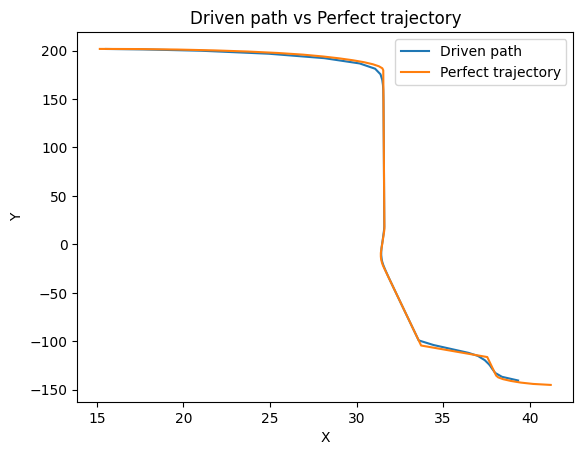

DTW: 259.7981186814485
Safety score: 734.067787208943
Calculated score: 734.07
There are 10 generated scenarios
There are 2 files with "auto_scenario" in their name.


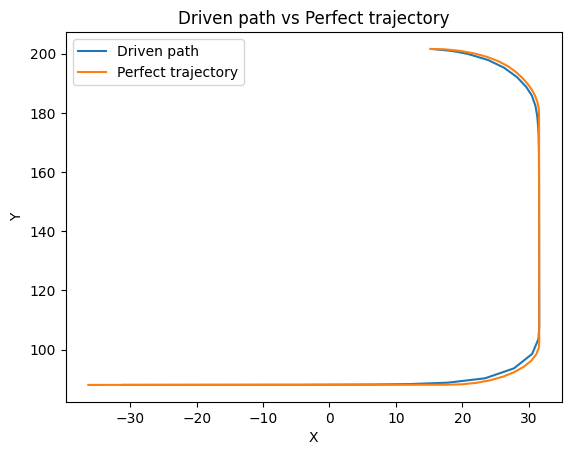

DTW: 139.85405653653729
Safety score: 854.4969814507157
Calculated score: 854.50
There are 10 generated scenarios
There are 3 files with "auto_scenario" in their name.


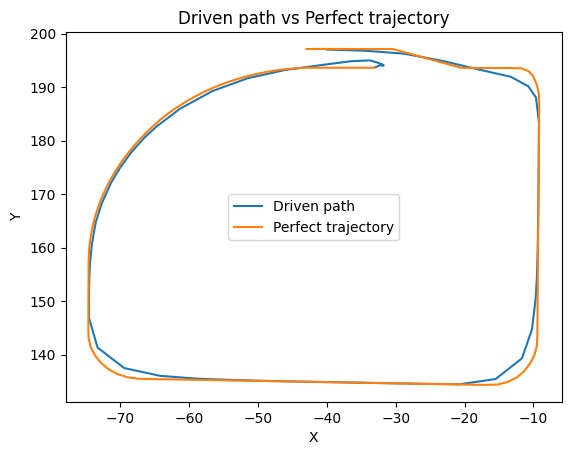

DTW: 232.0204426468813
Safety score: 762.0958716860104
Calculated score: 762.10
There are 10 generated scenarios
There are 4 files with "auto_scenario" in their name.


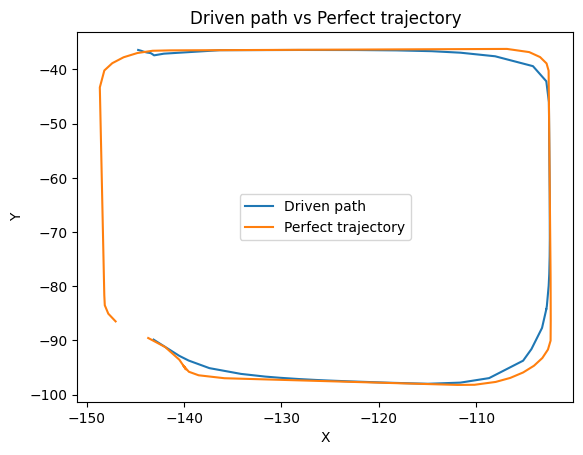

DTW: 893.7431579233295
Safety score: 100.27768150076881
Calculated score: 100.28
There are 10 generated scenarios
There are 5 files with "auto_scenario" in their name.


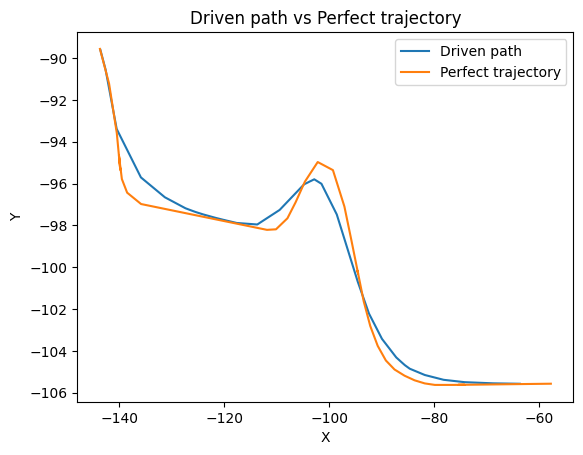

DTW: 87.12288678197295
Safety score: 905.0916334949295
Calculated score: 905.09
There are 10 generated scenarios
There are 6 files with "auto_scenario" in their name.


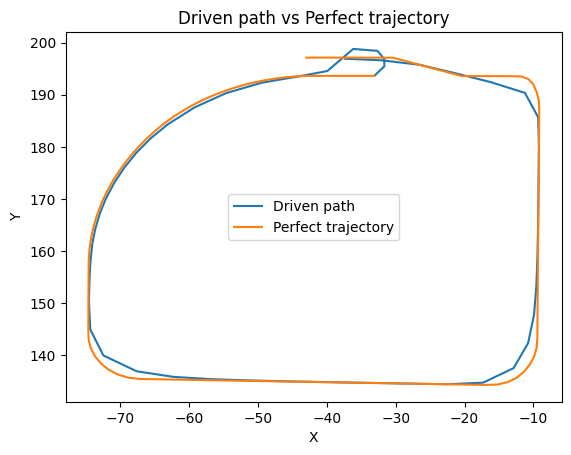

DTW: 217.90963784738318
Safety score: 776.1784147571403
Calculated score: 776.18
There are 10 generated scenarios
There are 7 files with "auto_scenario" in their name.


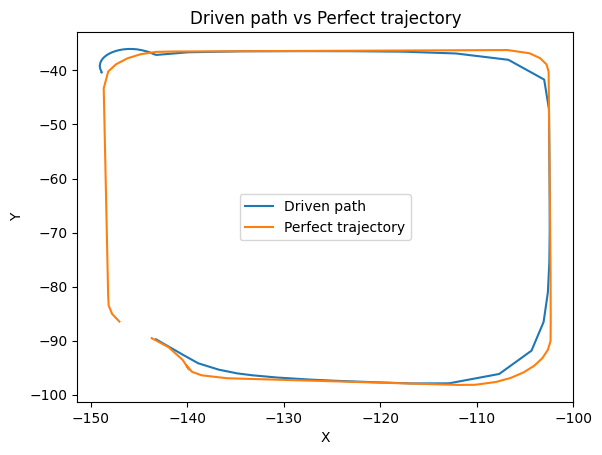

DTW: 845.2750352348177
Safety score: 148.7659796740251
Calculated score: 148.77
There are 10 generated scenarios
There are 8 files with "auto_scenario" in their name.


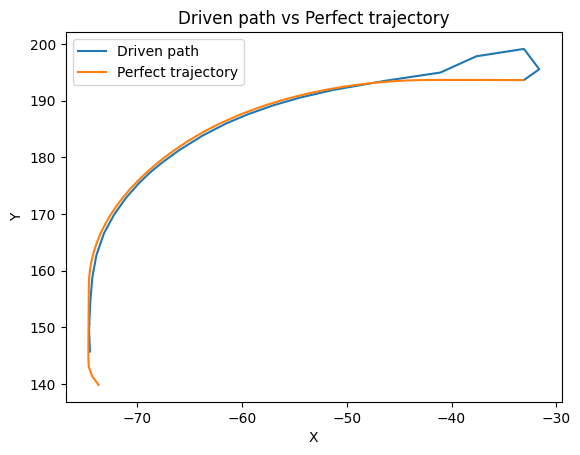

DTW: 104.54227444376664
Safety score: 889.8856978200324
Calculated score: 889.89
There are 10 generated scenarios
There are 9 files with "auto_scenario" in their name.


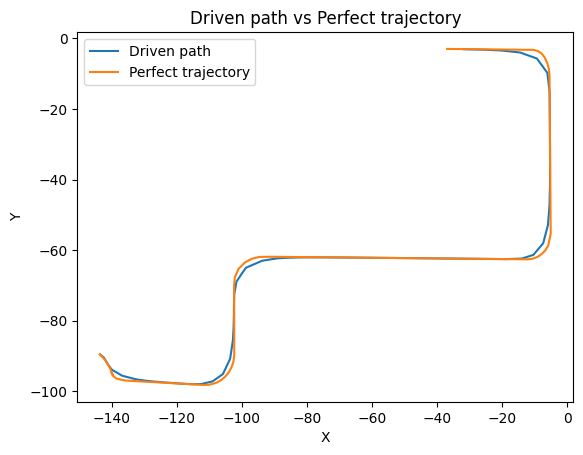

DTW: 208.4444818928072
Safety score: 784.712601805452
Calculated score: 784.71
There are 10 generated scenarios
There are 10 files with "auto_scenario" in their name.


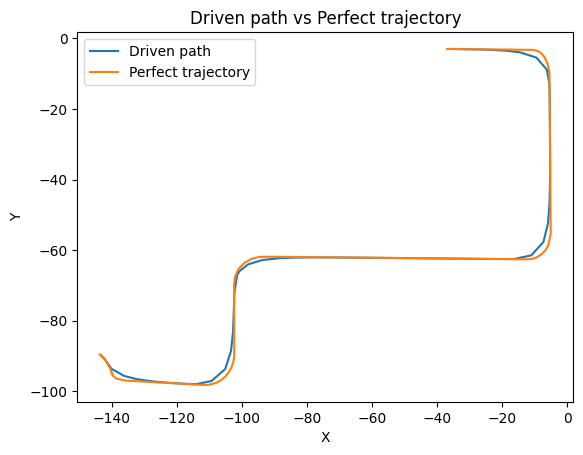

DTW: 198.6778794910539
Safety score: 793.9732957822781
Calculated score: 793.97
There are 10 generated scenarios


In [20]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from dtw import *
import math
import json
import matplotlib.pyplot as plt
import numpy as np
import os

rated_objects = []
count = 0
for root, dirs, files in os.walk('user_input'):
    for file in files:
        if 'auto_scenario' in file:
            count += 1
            print(f'There are {count} files with "auto_scenario" in their name.')
            
            # Extract the number from the file name
            scenario_num = int(file.split('_')[-1].split('.')[0])
            
            # Open the corresponding route file
            with open(f'user_input/route_{scenario_num}.json', 'r') as f:
                trajectory = json.load(f)

            with open(f'user_input/auto_scenario_{scenario_num}.json') as f:
                driven_path_data = json.load(f)

            driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

            # Plot the driven path
            plt.plot(*zip(*driven_path), label='Driven path')

            # Extract the X and Y coordinates from each location
            x_coords = [location['X'] for location in trajectory]
            y_coords = [location['Y'] for location in trajectory]

            # Plot the route on a graph
            plt.plot(x_coords, y_coords, label='Perfect trajectory')

            plt.title('Driven path vs Perfect trajectory')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.legend()
            plt.show()

            # Initialize lists to store data
            timestamps = []
            velocities = []
            throttles = []

            # Extract values from data
            game_time = [entry['game_time'] for entry in driven_path_data]
            velocity = [entry['vehicle_velocity']['x'] for entry in driven_path_data]
            throttle = [entry['vehicle_throttle'] for entry in driven_path_data]

            # Calculate average velocity
            avg_velocity = np.mean(velocity)
            # print(f'Average velocity: {avg_velocity:.2f} m/s')

            # # Plot velocity over time
            # plt.plot(game_time, velocity)
            # plt.xlabel('Time (s)')
            # plt.ylabel('Velocity (m/s)')
            # plt.show()



            def rate_driven_path(trajectory, driven_path, avg_velocity, num_collisions):
                # Calculate the DTW distance between the trajectory and driven path
                distance, _ = fastdtw(trajectory, driven_path, dist=euclidean)
                
                print("DTW: "+str(distance))
                # Calculate the safety score based on DTW distance and average velocity
                safety_score = max(0, 1000 - distance - avg_velocity)
                
                # Penalize for number of collisions
                safety_score -= num_collisions * (0.95**num_collisions)
                
                print("Safety score: "+str(safety_score))
                return safety_score

            perfect_trajectory_array = list(zip(x_coords, y_coords))
            driven_path_array = np.array(driven_path)

            calculated_score = rate_driven_path(perfect_trajectory_array, driven_path_array,avg_velocity,10)
            print(f'Calculated score: {calculated_score:.2f}')

            # Open the file for reading
            with open('user_input/scenarios.json', 'r') as f:
                data = json.load(f)

            print(f'There are {len(data)} generated scenarios')
            
           
            # Find the object with the desired scenario_num
            for obj in data:
                if obj['scenario_num'] == scenario_num:
                    # Add the new variable
                    obj['calculate_score'] = calculated_score  # Replace 0 with your desired value
                    rated_objects.append(obj)

# Open the file for writing
with open('user_input/rated_scenarios.json', 'w') as f:
    json.dump(rated_objects, f,indent=4)



In [25]:
import json
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPRegressor

# Load data from JSON file
with open('user_input/rated_scenarios.json', 'r') as f:
    data = json.load(f)

# Extract features and target variable
X = []
y = []
for obj in data:
    X.append([
        obj['weather'],
        obj['vehicle'],
        obj['traffic'],
        obj['emergency'],
        obj['timeOfDay'],
        obj['location'],
        obj['intersections'],
        int(obj['pedestrians']),
        int(obj['pedestrian_cross']),
        # obj['start_x'],
        # obj['start_y'],
        # obj['end_x'],
        # obj['end_y'],
        obj['route_length'],
        
    ])
    y.append(obj['calculate_score'])
X = np.array(X)
y = np.array(y)

# Encode categorical features
categorical_features = [0, 1, 2, 3, 4, 5]
encoders = []
for i in categorical_features:
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)
    X[:, i] = le.fit_transform(X[:, i])
    encoders.append((le, ohe))
X = ohe.fit_transform(X)

# Split data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train neural network regressor
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000)
nn.fit(X_train, y_train)

# Make predictions on test set
y_pred = nn.predict(X_test)

# Evaluate model performance (e.g. using mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Load data from JSON file
with open('user_input/scenarios.json', 'r') as f:
    data = json.load(f)

# Extract features
X_unrated = []
for obj in data:
    X_unrated.append([
        obj['weather'],
        obj['vehicle'],
        obj['traffic'],
        obj['emergency'],
        obj['timeOfDay'],
        obj['location'],
        obj['intersections'],
        int(obj['pedestrians']),
        int(obj['pedestrian_cross']),
        # obj['start_x'],
        # obj['start_y'],
        # obj['end_x'],
        # obj['end_y'],
        obj['route_length']
    ])
# print(X_unrated)
X_unrated = np.array(X_unrated)

# Encode categorical features
for i in categorical_features:
    le, ohe = encoders[i]
    X_unrated[:, i] = le.transform(X_unrated[:, i])
X_unrated = ohe.transform(X_unrated)

# Make predictions on unrated scenarios
y_pred_unrated = nn.predict(X_unrated)


for obj, pred in zip(data, y_pred_unrated):
    print(f"W: {obj['weather']}, V: {obj['vehicle']}, T: {obj['traffic']}, E: {obj['emergency']}, TD: {obj['timeOfDay']}, L: {obj['location']}, I: {obj['intersections']}, P: {int(obj['pedestrians'])}, PC: {int(obj['pedestrian_cross'])}, RL: {obj['route_length']}")
    print(f"Predicted Score: {pred:.2f}")
    print()




MSE: 32508.78
W: Rain, V: Truck, T: Light, E: No, TD: Day, L: Country, I: 7, P: 0, PC: 1, RL: 196.5948088169098
Predicted Score: 148.38

W: Rain, V: Van, T: Light, E: Yes, TD: Night, L: Downtown, I: 9, P: 1, PC: 1, RL: 356.72726690769196
Predicted Score: 734.19

W: Sunny, V: Small, T: Light, E: No, TD: Night, L: Urban, I: 8, P: 0, PC: 1, RL: 240.0510179400444
Predicted Score: 776.29

W: Rain, V: Van, T: Heavy, E: Yes, TD: Dusk, L: Downtown, I: 5, P: 1, PC: 0, RL: 184.15848898887634
Predicted Score: 854.42

W: Sunny, V: Van, T: Heavy, E: No, TD: Night, L: Country, I: 10, P: 0, PC: 0, RL: 258.05940064787865
Predicted Score: 606.47

W: Rain, V: Van, T: Heavy, E: Yes, TD: Night, L: Urban, I: 8, P: 1, PC: 0, RL: 240.0510179400444
Predicted Score: 762.04

W: Sunny, V: Small, T: Heavy, E: No, TD: Night, L: Urban, I: 3, P: 1, PC: 0, RL: 80.5826963186264
Predicted Score: 889.79

W: Sunny, V: Truck, T: Heavy, E: Yes, TD: Day, L: Country, I: 7, P: 0, PC: 0, RL: 196.5948088169098
Predicted Score: 

Dynamic time warping
Dynamic time warping (DTW) is an algorithm for measuring similarity between two temporal sequences, which may vary in speed. 
For instance, similarities in walking could be detected using DTW, even if one person was walking faster than the other, 
or if there were accelerations and decelerations during the course of an observation. 

In [ ]:
import numpy as np
from dtw import *

# Load the perfect and driven path JSON files
with open('user_input/auto_scenario_0.json') as f:
    perfect_path_data = json.load(f)
    
with open('user_input/manual_scenario_0.json') as f:
    driven_path_data = json.load(f)

# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# Convert the paths to numpy arrays
perfect_path_array = np.array(perfect_path)
driven_path_array = np.array(driven_path)

# Define a distance function to use with DTW (here, we use Euclidean distance)
def distance_func(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))

# Compute the similarity value using DTW
d, _, _, _ = dtw(perfect_path, driven_path, dist=distance_func)
similarity = d

print("DTW: "+ str(similarity))

In [ ]:
from dtw import dtw
import numpy as np
import math

def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)


# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# Convert the paths to numpy arrays
perfect_path_array = np.array(perfect_path)
driven_path_array = np.array(driven_path)

# Calculate the DTW distance between the two paths
distance,_,_,_= dtw(perfect_path_array, driven_path_array,dist=euclidean_distance)

# Print the DTW distance
print("DTW distance:", distance)

Paths plotted as graphs

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the perfect and driven path JSON files
with open('user_input/auto_scenario_0.json') as f:
    perfect_path_data = json.load(f)
    
with open('user_input/manual_scenario_0.json') as f:
    driven_path_data = json.load(f)

# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# Plot the perfect path
plt.plot(*zip(*perfect_path))
plt.title('Auto Driven path')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot the driven path
plt.plot(*zip(*driven_path))
plt.title('Manual Driven path')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot both paths on the same graph
plt.plot([x for x, y in perfect_path], [y for x, y in perfect_path], 'b-', label='Perfect path')
plt.plot([x for x, y in driven_path], [y for x, y in driven_path], 'r-', label='Driven path')
plt.legend()
plt.show()

Plot Velocity over time

In [ ]:
import json
import matplotlib.pyplot as plt

# Load data from JSON file
with open('user_input/manual_scenario_0.json', 'r') as f:
    data = json.load(f)

# Initialize lists to store data
timestamps = []
velocities = []
throttles = []

# Extract values from data
game_time = [entry['game_time'] for entry in data]
velocity = [entry['vehicle_velocity']['x'] for entry in data]
throttle = [entry['vehicle_throttle'] for entry in data]

# Plot velocity over time
plt.plot(game_time, velocity)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

# Plot throttle over time
plt.plot(game_time, throttle)
plt.xlabel('Time (s)')
plt.ylabel('Throttle')
plt.show()